In [6]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

# 1. Анализ областей устойчивости

#### 1.1 Изобразите области устойчивости для различных вариантов явного и неявного метода Рунге-Кутта. Рекомендуется использовать библиотеку NodePy.

In [151]:
import nodepy.runge_kutta_method as rk

rk4 = rk.loadRKM('RK44')  # Классический метод Рунге-Кутта 4-го порядка (явный)
sdirk23 = rk.loadRKM('SDIRK23')  # SDIRK метод 3-го порядка (неявный)
gl3 = rk.loadRKM('GL3')  # Гаусс-Лежандр 3-го порядка (неявный)


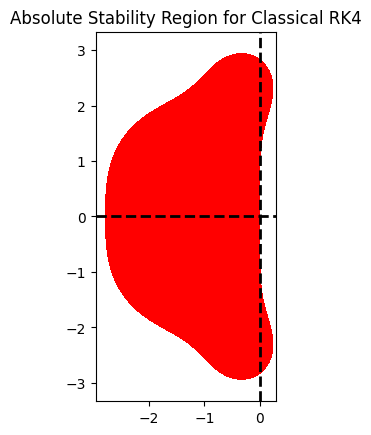

In [8]:
rk4.plot_stability_region()
clear_output(True)

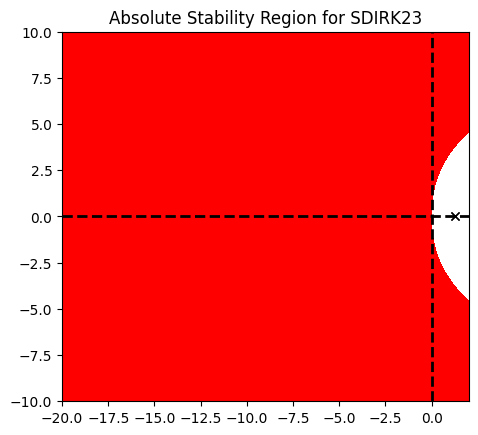

In [9]:
sdirk23.plot_stability_region()
clear_output(True)

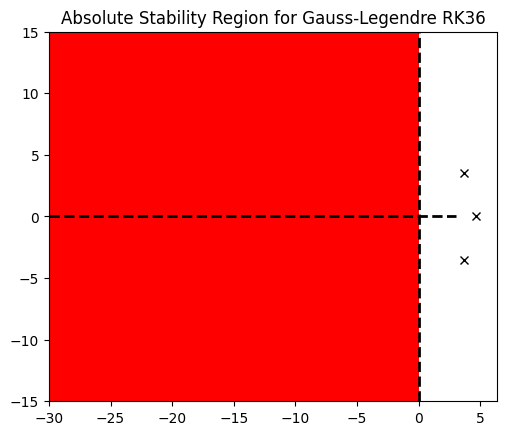

In [10]:
gl3.plot_stability_region()
clear_output(True)

#### 1.2 Проанализируйте, как будет выполняться условие A-устойчивости и L-устойчивости при различных значениях шага сетки и величины собственного числа

Докажем на примере метода Рунге-Кутта 4 порядка, что отсутствует и A-устойчивость и L-устойчивость.

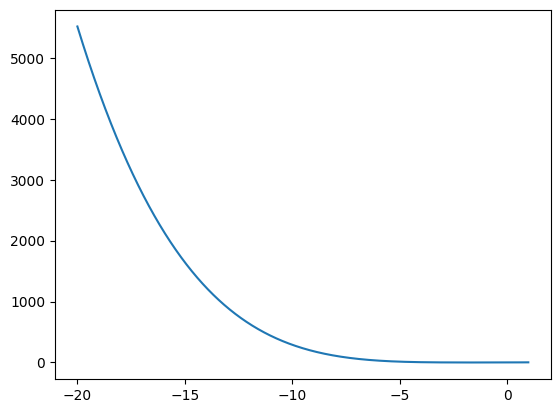

In [32]:
rk4.plot_stability_function()

Уже на данном графике видно, что область устойчивости не ограничена, а значит, метод не является A-устойчивым (а значит и не L-устойчивым). Однако поиграемся с шагом сетки и величиной собственного числа, чтобы убедиться в этом.

In [41]:
rk4.stability_function_unexpanded()

z*(z/2 + 1)/3 + z*(z*(z/2 + 1)/2 + 1)/3 + z*(z*(z*(z/2 + 1)/2 + 1) + 1)/6 + z/6 + 1

In [42]:
rk4.stability_function_unexpanded().simplify()

z**4/24 + z**3/6 + z**2/2 + z + 1

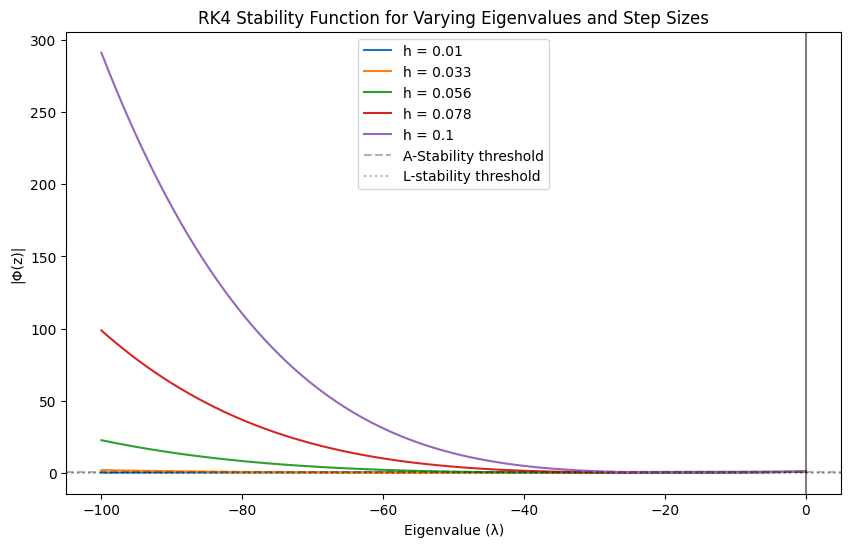

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stability_region(eigenvalues, step_sizes, stab_func, name):
    p, q = stab_func()

    plt.figure(figsize=(10, 6))

    for h in step_sizes:
        h = np.ceil(h * 1000) / 1000

        abs_values = []
        for lam in eigenvalues:
            z = lam * h
            abs_values.append(abs(p(z) / q(z)))
        
        plt.plot(eigenvalues, abs_values, label=f'h = {h}')

    plt.axhline(y=1, color='k', linestyle='--', alpha=0.3, label='A-Stability threshold')
    plt.axhline(y=0, color='k', linestyle=':', alpha=0.3, label='L-stability threshold')

    plt.axvline(x=0, color='k', alpha=0.5)
    plt.xlabel('Eigenvalue (λ)')
    plt.ylabel('|Φ(z)|')
    plt.title(f'{name} Stability Function for Varying Eigenvalues and Step Sizes')
    plt.legend()
    plt.show()

a_eigenvalues = np.linspace(-100, 0, 100)
l_eigenvalues = np.linspace(-1e+6, 0, 500)
step_sizes = np.linspace(0.01, 0.1, 5)

plot_stability_region(a_eigenvalues, step_sizes, rk4.stability_function, 'RK4')

Посмотрим для других методов Рунге-Кутта. (SDIRK23, GL3)

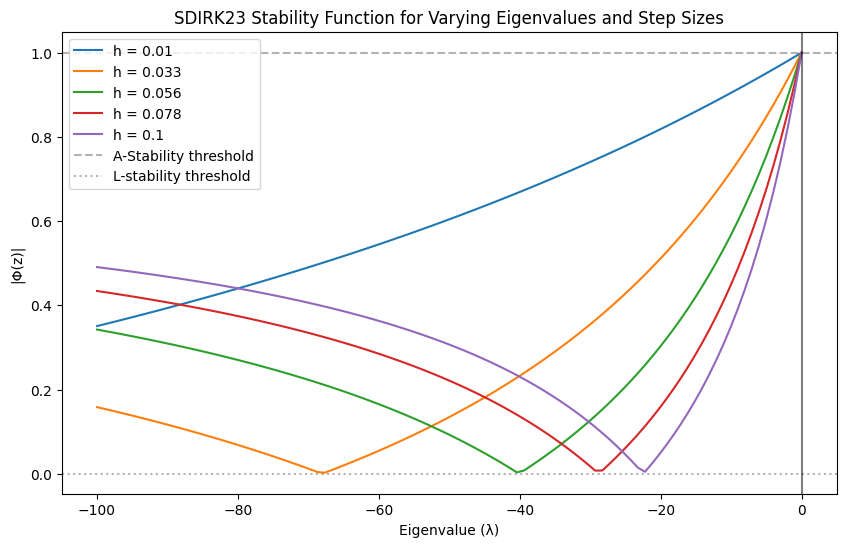

In [87]:
plot_stability_region(a_eigenvalues, step_sizes, sdirk23.stability_function, 'SDIRK23')

Выглядит так что SDIRK23 является А-устойчивым. Проверим L-устойчивость...

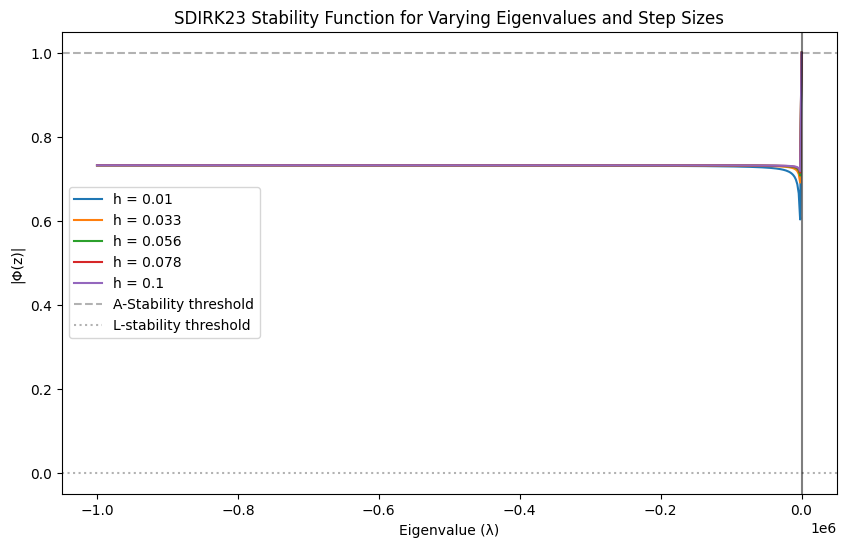

In [89]:
plot_stability_region(l_eigenvalues, step_sizes, sdirk23.stability_function, 'SDIRK23')

L-устойчивость не выполняется, (т.к. примерно на -1+e6, lim z→−∞ ∣ϕ(z)∣ != 0)

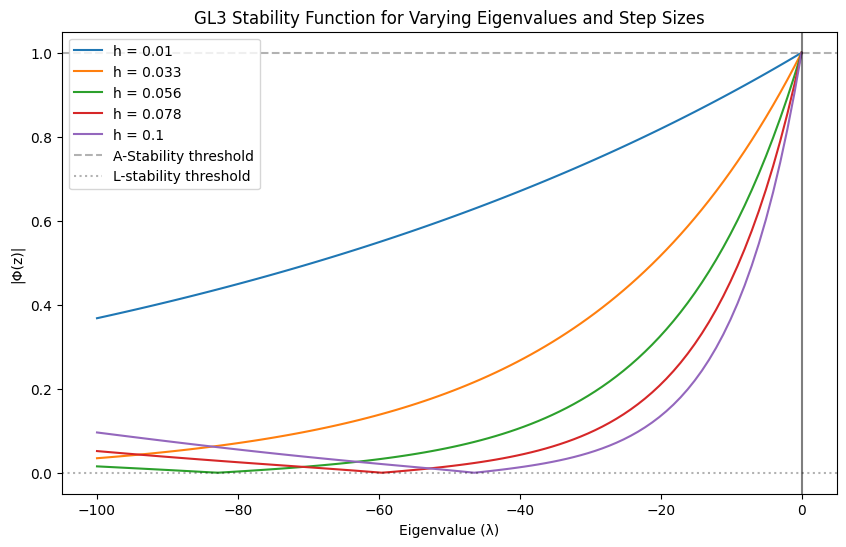

In [92]:
plot_stability_region(a_eigenvalues, step_sizes, gl3.stability_function, 'GL3')

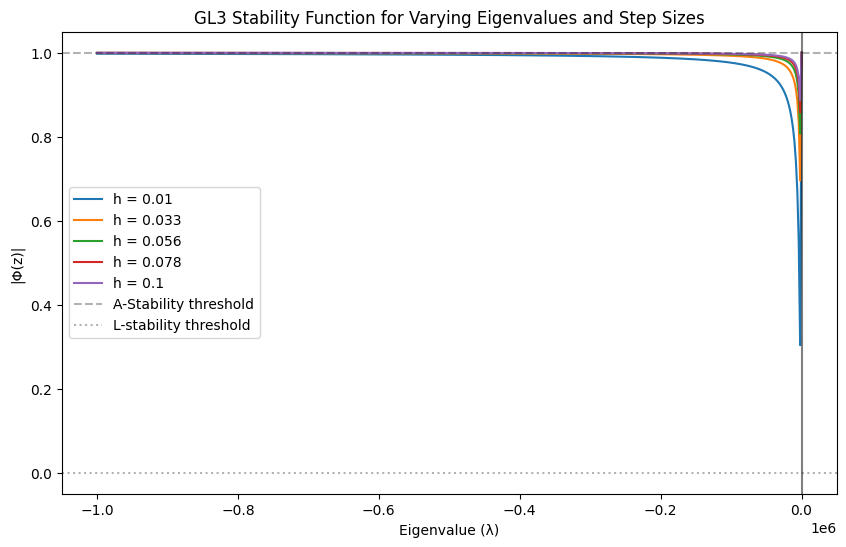

In [93]:
plot_stability_region(l_eigenvalues, step_sizes, gl3.stability_function, 'GL3')

Для GS3 тоже самое!

# 2. Численное решение ОДУ

#### 2.1 Решите следующие две системы уравнений различными явными и неявными численными методами

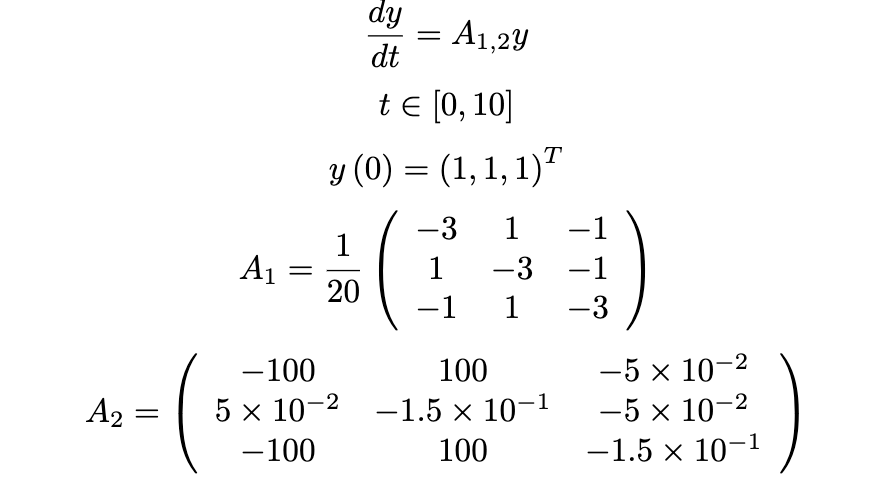

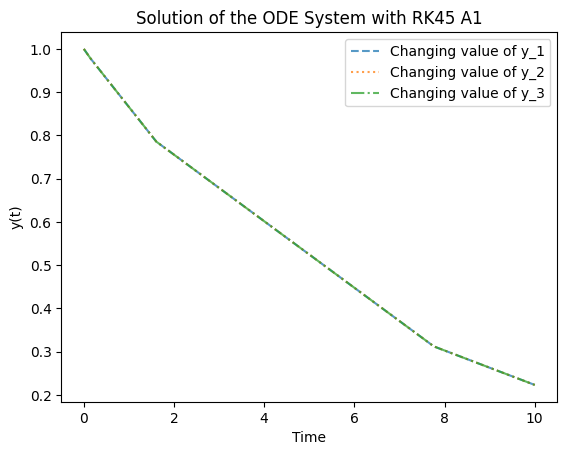

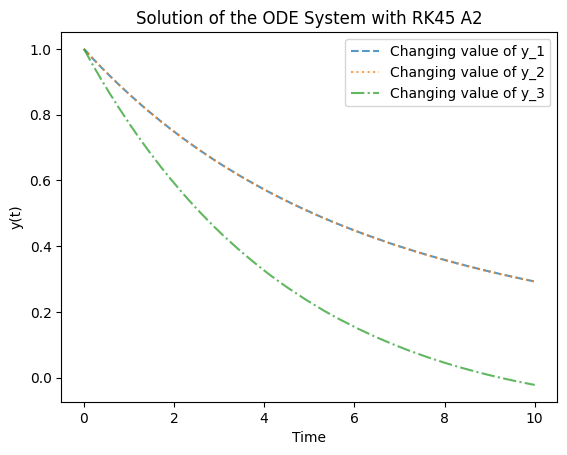

In [149]:
from scipy.integrate import solve_ivp

def plot_ODE_solution(solution, name):
    plt.plot(solution.t, solution.y[0], label="Changing value of y_1", alpha=0.75, linestyle='--')
    plt.plot(solution.t, solution.y[1], label="Changing value of y_2", alpha=0.75, linestyle=':')
    plt.plot(solution.t, solution.y[2], label="Changing value of y_3", alpha=0.75, linestyle='-.')
    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.legend()
    plt.title(f'Solution of the ODE System with {name}')
    plt.show()


A1 = np.array([[-3, 1, -1],
                   [1, -3, -1],
                   [-1, 1, -3]]) / 20
def ode_system_A1(t, y):
    return A1 @ y

A2 = np.array([[-100, 100, -5e-2],
                   [5e-2, -1.5e-1, -5e-2],
                   [-100, 100, -1.5e-1]])
def ode_system_A2(t, y):
    return A2 @ y

y0 = np.array([1, 1, 1])

t_span = (0, 10)

sol_A1_RK45 = solve_ivp(ode_system_A1, t_span, y0, method='RK45')
sol_A2_RK45 = solve_ivp(ode_system_A2, t_span, y0, method='RK45')

plot_ODE_solution(sol_A1_RK45, 'RK45 A1')
plot_ODE_solution(sol_A2_RK45, 'RK45 A2')

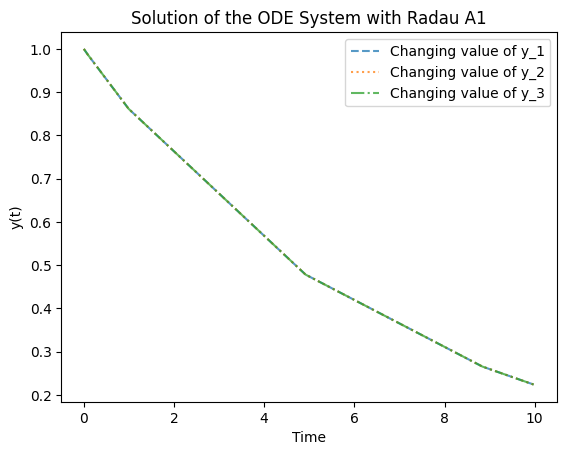

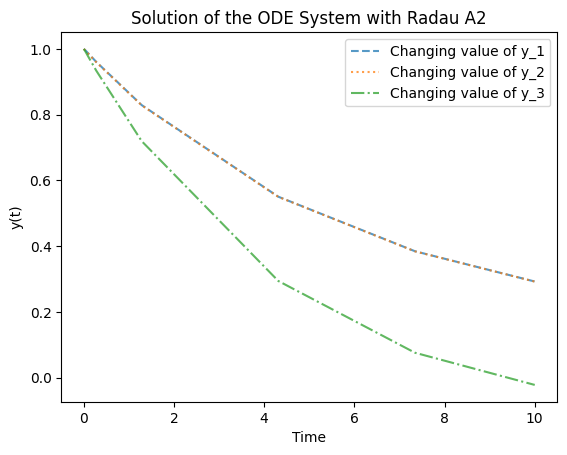

In [144]:
sol_A1_Radau = solve_ivp(ode_system_A1, t_span, y0, method='Radau')

sol_A2_Radau = solve_ivp(ode_system_A2, t_span, y0, method='Radau')

plot_ODE_solution(sol_A1_Radau, 'Radau A1')
plot_ODE_solution(sol_A2_Radau, 'Radau A2')

#### 2.2 Проанализируйте размер требуемого шага, скорость сходимости, затраченное время

In [169]:
import time
from scipy.interpolate import interp1d

def ode_system(t, y, A):
    return A @ y

def solve_and_time(A, y0, t_span, step_size, method):
    t_eval = np.arange(t_span[0], t_span[1], step_size)
    times = []
    sol = None
    for i in range(50):
        start_time = time.time()
        sol = solve_ivp(lambda t, y: ode_system(t, y, A), t_span, y0, method=method, t_eval=t_eval)
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)

    elapsed_time = np.median(times)
    return sol, elapsed_time


def run_perf_comparison(method, A, A_name):
    y0 = np.array([1, 1, 1])

    t_span = (0, 10)

    step_sizes = [1, 0.1, 0.05, 0.01, 0.005, 0.001, 1e-4]

    elapsed_times = []
    errors = []

    # Reference solution with a very small step size
    reference_solution, _ = solve_and_time(A, y0, t_span, min(step_sizes), method)

    for step_size in step_sizes:
        sol, elapsed_time = solve_and_time(A, y0, t_span, step_size, method)
        elapsed_times.append(elapsed_time)
        
        # Interpolate the solution to the reference solution time points for comparison
        interp_sol = interp1d(sol.t, sol.y, kind='cubic', axis=1, fill_value="extrapolate")
        interpolated_y = interp_sol(reference_solution.t)

        # Compute error as the maximum difference from the reference solution at each time point
        error = np.max(np.abs(interpolated_y - reference_solution.y), axis=1)
        errors.append(np.mean(error))

    print(f"Step size - Speed of conversion - Error Comparison for {method} on {A_name}")

    # Plotting
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(step_sizes, elapsed_times, 'o-')
    plt.xlabel('Step size')
    plt.ylabel('Elapsed Time (seconds)')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Elapsed Time vs Step Size')

    plt.subplot(1, 3, 2)
    plt.plot(step_sizes, errors, 'o-')
    plt.xlabel('Step size')
    plt.ylabel('Average Error')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Error vs Step Size')

    plt.subplot(1, 3, 3)
    plt.plot(elapsed_times, errors, 'o-')
    plt.xlabel('Elapsed Time (seconds)')
    plt.ylabel('Average Error')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Error vs Elapsed Time')

    plt.tight_layout()
    plt.show()

Step size - Speed of conversion - Error Comparison for RK45 on A1


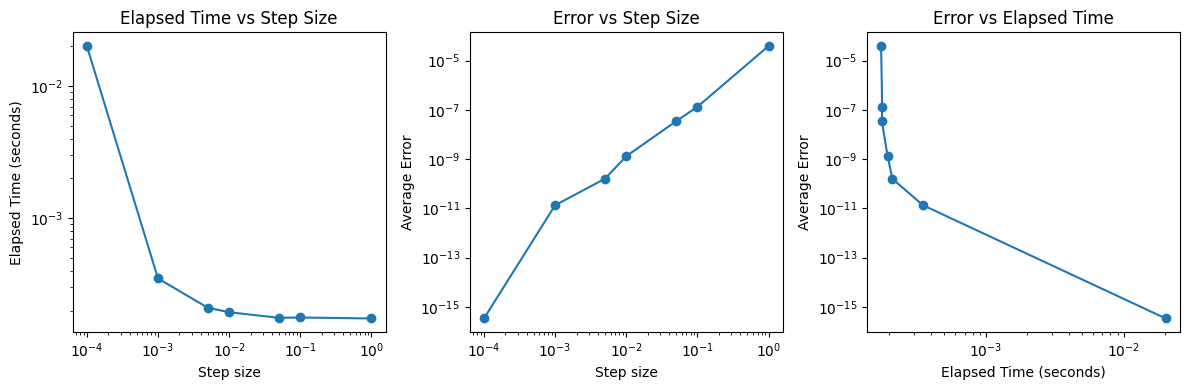

Step size - Speed of conversion - Error Comparison for RK45 on A2


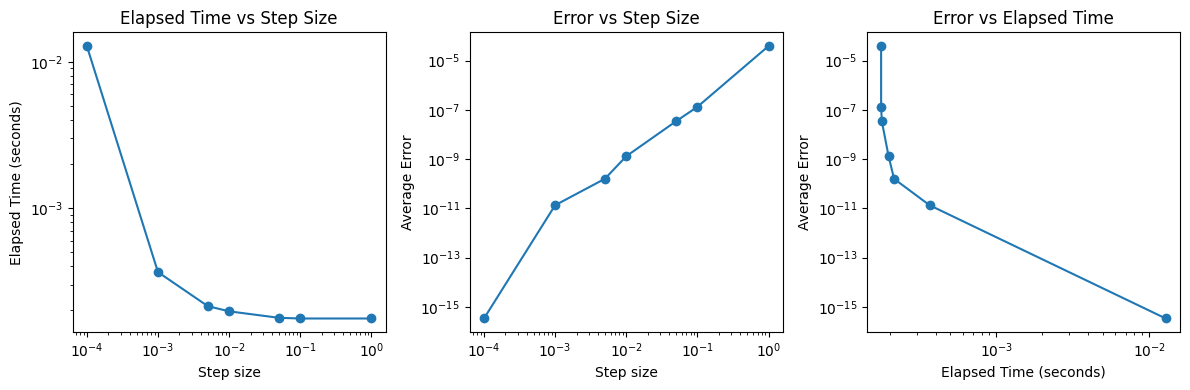

Step size - Speed of conversion - Error Comparison for Radau on A1


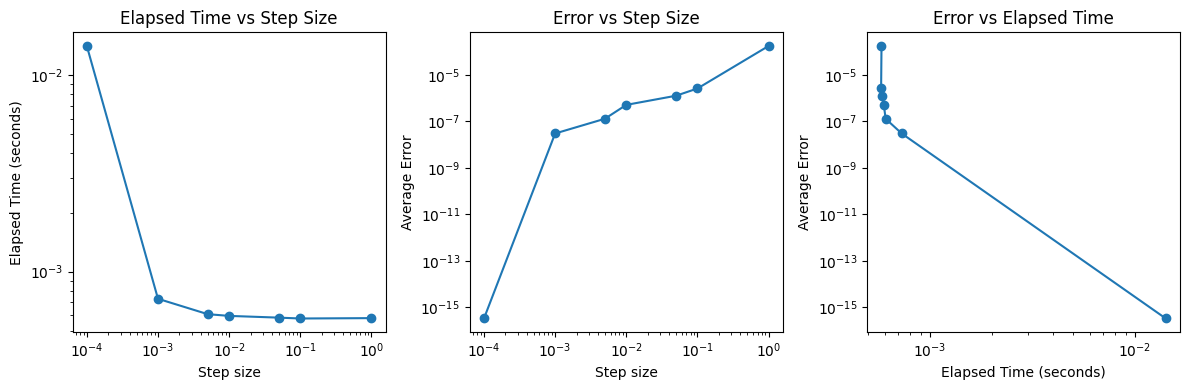

Step size - Speed of conversion - Error Comparison for Radau on A2


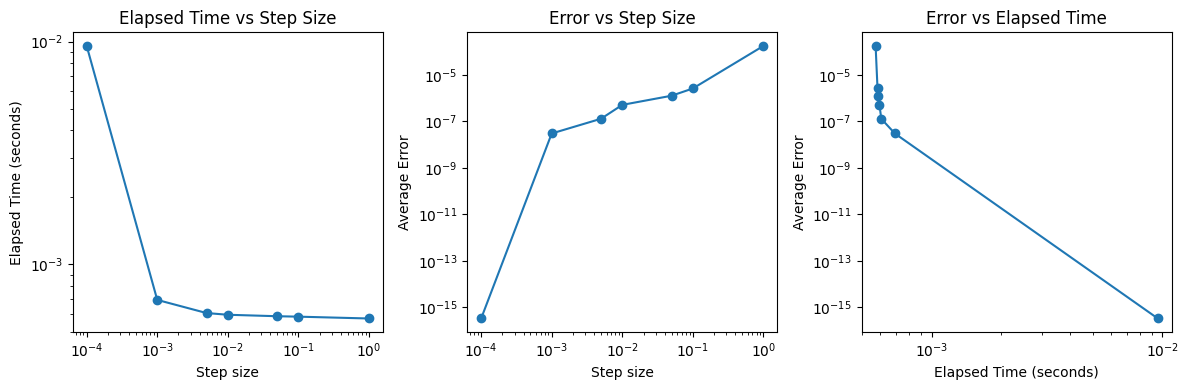

In [171]:
run_perf_comparison('RK45', A1, "A1")
run_perf_comparison('RK45', A1, "A2")
run_perf_comparison('Radau', A1, "A1")
run_perf_comparison('Radau', A1, "A2")

#### 2.3 Проанализируйте собственные числа каждой из систем (численно или сивольно), рассчитайте коэффициент жесткости (|Re (λ_hat) |/|Re (λ_bot) |), сделайте вывод о связи спектра системы, трудоемкости ее решения численными методами и области устойчивости метода

In [175]:
eigenvalues_A1 = np.linalg.eigvals(A1)
eigenvalues_A2 = np.linalg.eigvals(A2)

print(f"Eigenvalues of A1: {eigenvalues_A1}")
print(f"Eigenvalues of A2: {eigenvalues_A2}")

Eigenvalues of A1: [-0.1  -0.2  -0.15]
Eigenvalues of A2: [-1.00050000e+02 -4.99666741e-02 -2.00033376e-01]


In [177]:
def calculate_stiffness(eigenvalues):
    return np.ceil(np.max(np.abs(np.real(eigenvalues))) /np.min(np.abs(np.real(eigenvalues))) * 1000) / 1000

stiffness_coefficient_A1 = calculate_stiffness(eigenvalues_A1)
stiffness_coefficient_A2 = calculate_stiffness(eigenvalues_A2)

print(f"Stiffness coefficient of A1: {stiffness_coefficient_A1}")
print(f"Stiffness coefficient of A2: {stiffness_coefficient_A2}")

Stiffness coefficient of A1: 2.001
Stiffness coefficient of A2: 2002.335


Матрица А_1:

​* Собственные значения все действительные и отрицательные, что указывает на стабильную систему без колебательного поведения.
* Малый коэффициент жесткости, что говорит о том, что система не отличается особой жесткостью. Умеренная разница между действительными частями собственных значений означает, что стандартные явные методы могут работать хорошо при достаточно малом размере шага.

Матрица А_2:

* Собственные значения также являются реальными и отрицательными, но имеют значительную разницу в величине.
* Больший (большой) коэффициент жесткости может указывать на жесткую систему. Большое отрицательное собственное значение наряду с меньшими означает, что для явных методов может потребоваться достаточно малый размер шага для поддержания стабильности.

#### 2.4 Сравните результаты с аналитическим решением, полученным при помощи операторной экспоненты

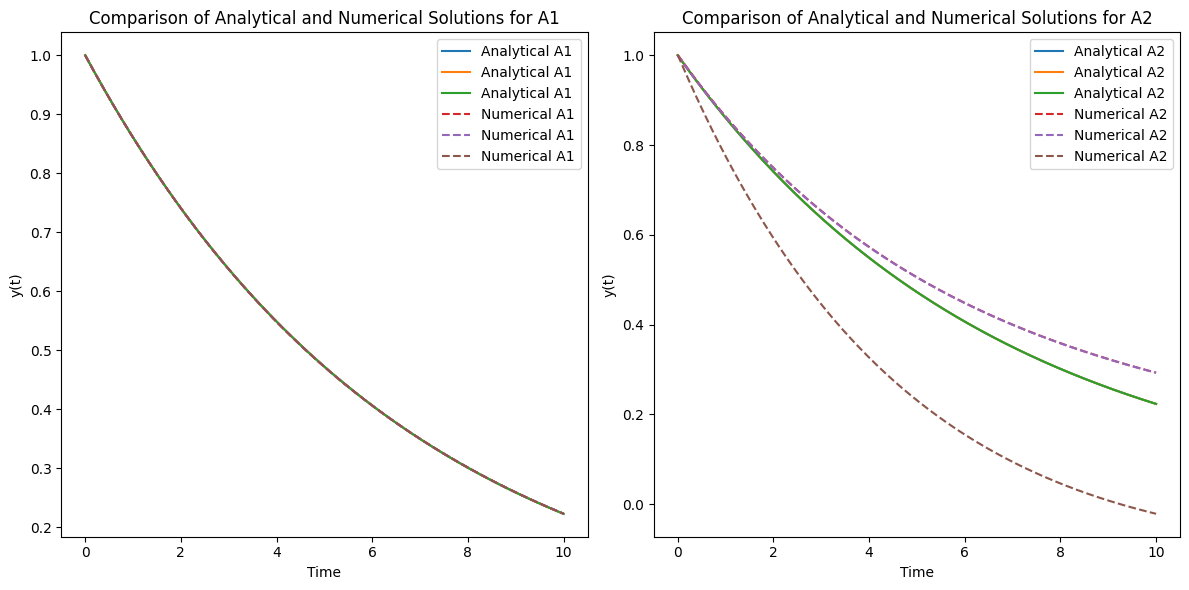

In [185]:
from scipy.linalg import expm

def analytical_solution(A, y0, t):
    return expm(A * t) @ y0

t_span = (0, 10)
t_eval = np.arange(t_span[0], t_span[1], 0.0001)
reference_solution_A1 = solve_ivp(lambda t, y: ode_system(t, y, A1), t_span, y0, method="RK45", t_eval=t_eval)
reference_solution_A2 = solve_ivp(lambda t, y: ode_system(t, y, A2), t_span, y0, method="Radau", t_eval=t_eval)


analytical_y_A1 = np.array([analytical_solution(A1, y0, ti) for ti in reference_solution_A1.t])
analytical_y_A2 = np.array([analytical_solution(A2, y0, ti) for ti in reference_solution_A2.t])


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(reference_solution_A1.t, analytical_y_A1, label='Analytical A1')
plt.plot(reference_solution_A1.t, reference_solution_A1.y.T, label='Numerical A1', linestyle='--')

plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Comparison of Analytical and Numerical Solutions for A1')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(reference_solution_A2.t, analytical_y_A1, label='Analytical A2')
plt.plot(reference_solution_A2.t, reference_solution_A2.y.T, label='Numerical A2', linestyle='--')

plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Comparison of Analytical and Numerical Solutions for A2')
plt.legend()

plt.tight_layout()
plt.show()


#### 2.5 Постройте численные решения с различной точностью, проанализируйте влияние точности на производительность методов

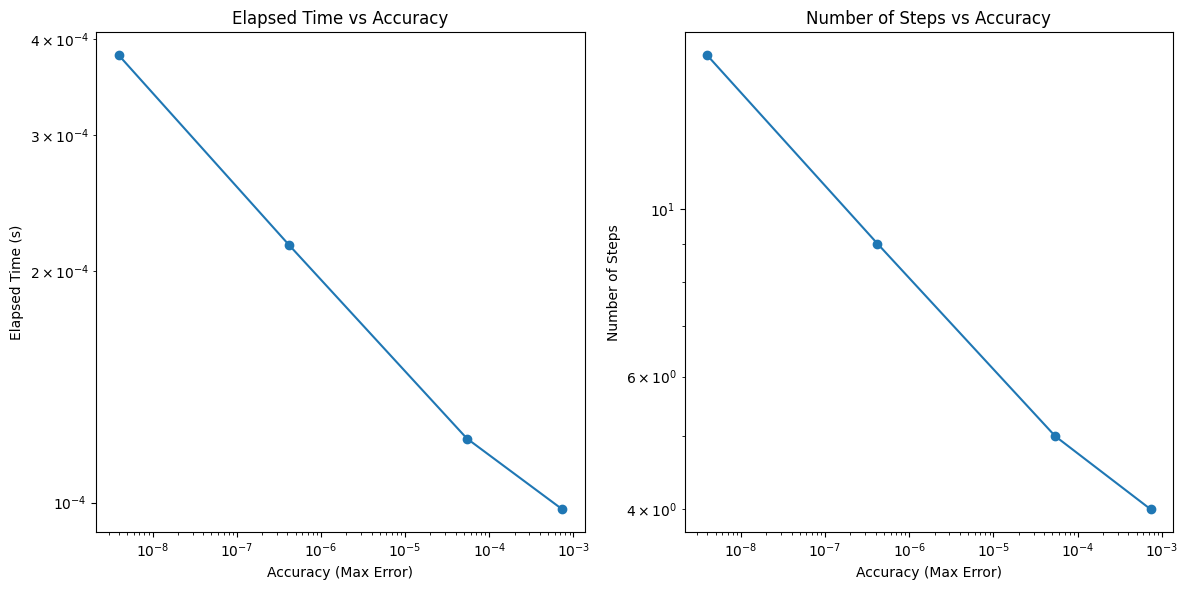

In [191]:
tolerances = [1e-2, 1e-4, 1e-6, 1e-8]

elapsed_times = []
step_counts = []
accuracy_levels = []

for tol in tolerances:
    exec_times = []
    sol = None
    for i in range(50):
        start_time = time.time()
        sol = solve_ivp(ode_system_A1, t_span, y0, method='RK45', rtol=tol, atol=tol)
        exec_times.append(time.time() - start_time)
    elapsed_time = np.median(exec_times)


    elapsed_times.append(elapsed_time)
    step_counts.append(len(sol.t))

    analytical_y = np.array([analytical_solution(A1, y0, ti) for ti in sol.t])

    error = np.max(np.linalg.norm(sol.y - analytical_y.T, axis=0))
    accuracy_levels.append(error)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracy_levels, elapsed_times, 'o-')
plt.xlabel('Accuracy (Max Error)')
plt.ylabel('Elapsed Time (s)')
plt.xscale('log')
plt.yscale('log')
plt.title('Elapsed Time vs Accuracy')

plt.subplot(1, 2, 2)
plt.plot(accuracy_levels, step_counts, 'o-')
plt.xlabel('Accuracy (Max Error)')
plt.ylabel('Number of Steps')
plt.xscale('log')
plt.yscale('log')
plt.title('Number of Steps vs Accuracy')

plt.tight_layout()
plt.show()